# Methodology

## **Understanding the Environment and its Rewards**

The environment is a 2D grid world where the agent can move in four directions: up, down, left, and right. There are 3 different types of tiles: 
- **Empty tiles**: The agent can move freely on these tiles.
- **Wall tiles**: The agent cannot move through these tiles.
- **Goal tile**: The agent receives a reward of +1 when it reaches this tile.

The agent starts at a random position on the grid and must visit all goal tiles, making this a CPP (Coverage Path Planning) problem. The agent receives a reward of +2 for each goal tile it visits and a penalty of -1 for each step it takes to encourage shorter paths.

#### **Reward function:**

```python
        # Default baseline reward
        reward = -1

        # Check validity and apply penalties
        if not (0 <= ni < self.H and 0 <= nj < self.W and self.grid[ni, nj] == 0):
            # Invalid action: stay in place
            self.agent_pos = (i, j) 
        else:
            # Valid move: update position
            self.agent_pos = (ni, nj)

        # Check if on a target
        if self.agent_pos not in self.visited:
            if self.agent_pos in self.targets:
                reward = 2   # new target
            self.visited.add(self.agent_pos)
```

## **Levels**

The environment consists of 5 levels, all with the same grid size but with a changing number of goal tiles and walls. The levels are designed to increase in difficulty, with the first level being the easiest and the last level being the hardest. The levels are as follows, with the target tiles represented in green, the walls in black, and the empty tiles in white:

**Level 1**:

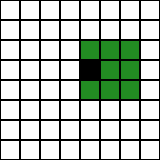

**Level 2**:

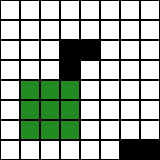

**Level 3**:

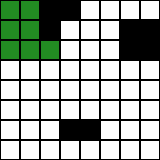

**Level 4**:

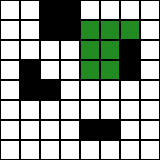

**Level 5**:

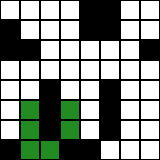

## **Baseline A\* Algorithm**

The A* algorithm is a well-known pathfinding algorithm that finds the shortest path from the start node to the goal node. It uses a heuristic function to estimate the cost of reaching the goal from the current node. The A* algorithm is used as a baseline to compare the performance of the reinforcement learning models.

**a_star_test.ipynb**

## **Models Used**

### **DQN (Deep Q-Network)**

The DQN algorithm is a reinforcement learning algorithm that uses a neural network to approximate the Q-value function. The Q-value function is used to estimate the expected future rewards for each action taken in a given state. The DQN algorithm uses experience replay and target networks to stabilize training and improve performance.

**dqn_mlp_test.ipynb** 

### **PPO (Proximal Policy Optimization) w/o L2 Regularization**

PPO is a policy gradient method that optimizes the policy directly. It uses a clipped objective function to ensure that the policy update does not deviate too much from the previous policy, which helps to stabilize training.

**ppo_mlp_test.ipynb**

### **PPO (Proximal Policy Optimization) w/ L2 Regularization**

This is the same as the previous PPO model but with L2 regularization added to the loss function. L2 regularization helps to prevent overfitting by adding a penalty for large weights in the model.

**ppo_mlp_l2_test.ipynb**

## **Policy Used**

### **Mlp Policy**

The MlpPolicy is a multi-layer perceptron (MLP) policy that uses fully connected layers to process the input state and output the action probabilities. The MlpPolicy is used in both the DQN and PPO models.


## **Working Agent Example**

In [1]:
import pygame
from stable_baselines3 import DQN
from coverage_env import CoverageEnv
from pygame_renderer import PygameRenderer

pygame.init()

env = CoverageEnv(curriculum=1)
model = DQN.load("models/dqn/mlp/coverage_lvl1.zip", env=env)
renderer = PygameRenderer(env, tile_size=50)

obs, _info = env.reset()
done = False

try:
    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                raise KeyboardInterrupt()

        # predict returns an array; convert to int
        raw_action, _ = model.predict(obs, deterministic=True)
        action = int(raw_action)  

        obs, reward, terminated, truncated, _info = env.step(action)
        done = terminated or truncated

        renderer.render()

        if done:
            obs, _info = env.reset()
            done = False

except KeyboardInterrupt:
    pass
finally:
    renderer.close()
    print("Renderer closed, notebook run complete.")


pygame 2.6.1 (SDL 2.28.4, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


2025-05-10 13:08:20.465 Python[53502:4448997] +[IMKClient subclass]: chose IMKClient_Modern
2025-05-10 13:08:20.465 Python[53502:4448997] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Renderer closed, notebook run complete.
